In [3]:
import matplotlib.pyplot as plt
import glacierml as gl

In [4]:
df, ref = gl.notebook_data_loader()

Global Volume: 101.48, UB: 39.16, LB: 42.34, STD: 42.19


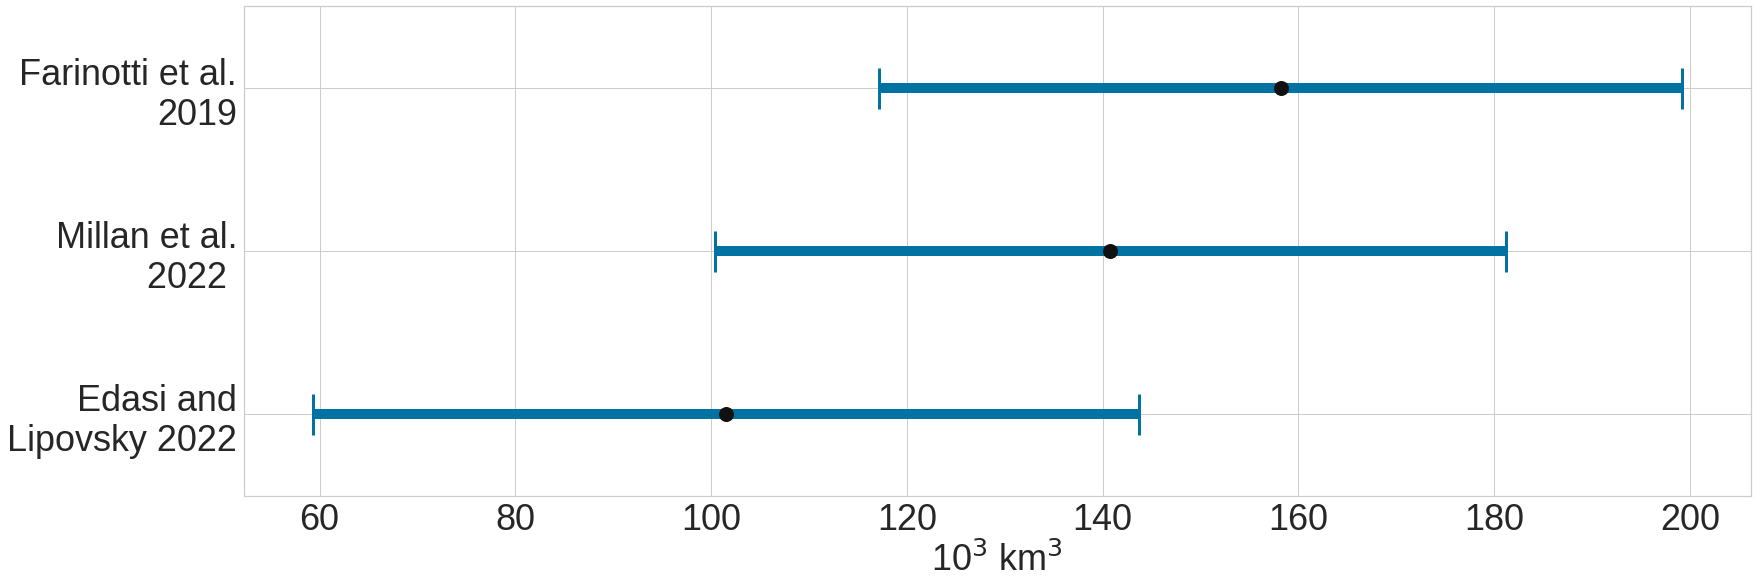

In [6]:


fig, ax = plt.subplots(1,1,figsize = (27,9))
# plt.suptitle('Global Estimates of Mountain Glacier Volume')
x = (101.48,140.8,158.17)
yr = (42.19,40.4,41.03,)

# y = (-1, 0, 1)

y = (
     f'Edasi and\nLipovsky 2022',
     f'Millan et al.\n2022 ',
     f'Farinotti et al.\n2019',
)
plt.errorbar(x, y, xerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
             ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
            )
plt.tick_params(axis='y', which='major', labelsize=36)
plt.tick_params(axis='x', which='major', labelsize=36)
# ax.margins(0.1, None)
ax.set_ylim(-0.5, 2.5)
plt.xlabel('10$^3$ km$^3$', fontsize = 36)
plt.grid(visible = True, axis = 'both')
plt.show()
# plt.savefig('figs/err_bars/global_df8.svg')
# plt.savefig('figs/err_bars/global_df8.eps')
# plt.savefig('figs/err_bars/global_df8.png')

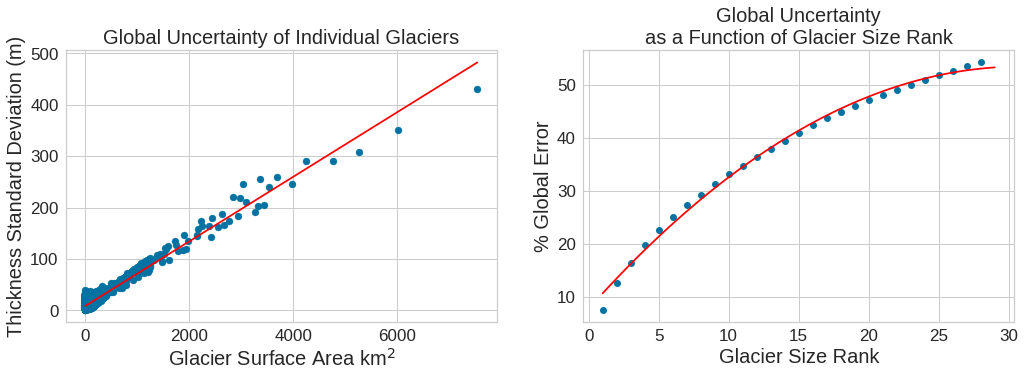

In [5]:
df['Test4'] =  df['Volume Std Dev'] / sum(df['Volume Std Dev']) * 100
df = df.sort_values('Test4', ascending = False)
df['TestLB'] = df['Lower Bound'] / sum(df['Lower Bound'])  * 100
df['TestUB'] = df['Upper Bound'] / sum(df['Upper Bound'])  * 100

df.sort_values('Test4', ascending = False)


fig, ax = plt.subplots(1, 2, figsize = (17,5))

x = df['Area']
y = df['Thickness Std Dev']

a, b = np.polyfit(x, y, 1)

ax[0].scatter(    
    x,
    y,
    marker = 'o', 
#     linestyle = 'none'
)
ax[0].set_title('Global Uncertainty of Individual Glaciers', fontsize = 20)
ax[0].set_ylabel('Thickness Standard Deviation (m)', fontsize = 20)
ax[0].set_xlabel('Glacier Surface Area km$^2$', fontsize = 20)

ax[0].plot(
    x, 
    a*x + b,
    color = 'red'
)


x = range(1, 29, 1)
y = df['Test4'].cumsum().head(28)

ax[1].plot(
    x,
#     range(0, 25, 1),
#     df['Area'].sort_values(ascending = False).head(25),
    y,
    marker = 'o', 
    linestyle = 'none'
)



model = np.poly1d(np.polyfit(x, y, 2))


polyline = np.linspace(1, 29, 50)

ax[1].plot(polyline, model(polyline), color = 'red')

ax[1].set_title('Global Uncertainty\nas a Function of Glacier Size Rank',
               fontsize = 20)
ax[1].set_ylabel('% Global Error', fontsize = 20)
ax[1].set_xlabel('Glacier Size Rank', fontsize = 20)

ax[0].tick_params(axis="both", labelsize=17)
ax[1].tick_params(axis="both", labelsize=17)

# fig.suptitle('Error Analysis', fontsize = 30, y = .98)

# plt.tight_layout()
# plt.savefig('figs/global_error/curves.eps')
# plt.savefig('figs/global_error/curves.svg')
# plt.savefig('figs/global_error/curves.png')
